In [1]:
import pandas as pd
import numpy as np
Dataframe1 = pd.read_csv('Properties.csv')
Other = pd.read_csv('Materials.csv').drop(['critical_temp','material'],axis=1)
Dataframe = pd.concat([Dataframe1,Other],axis=1)
original_columns = len(Dataframe.columns)
print(Dataframe.shape)
Dataframe.head()

(21263, 168)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


This code removes all columns from a DataFrame that have a variance below a certain threshold. The threshold is set to 0.05, meaning that any column with a variance less than 0.05 will be removed. This is done using the VarianceThreshold class from the sklearn.feature_selection module. The resulting DataFrame will have fewer columns and its shape will be printed at the end.

In [2]:
# remove all columns that have a very small variance
# this gets rid of features which are the same value 95% of the time
threshold=0.05 
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=threshold).fit(Dataframe)
Dataframe = pd.DataFrame(selector.transform(Dataframe),columns=Dataframe.columns[selector.get_support()])
Dataframe.shape

(21263, 132)

This code snippet is written in Python and it appears to be removing any duplicate columns from a DataFrame. The transpose() method is called on the DataFrame to swap rows and columns. Then, the drop_duplicates() method is called to remove any duplicate columns (now rows), keeping only the first occurrence of each column. Finally, the transpose() method is called again to swap the rows and columns back to their original orientation. The shape of the resulting DataFrame is then printed.

In [3]:
#drop any duplicate features
Dataframe = Dataframe.transpose().drop_duplicates(keep='first').transpose()
print(Dataframe.shape)

(21263, 132)


This code remove any columns from a DataFrame that are highly correlated with other columns. First, a correlation matrix is computed for the DataFrame using the corr() method. Then, an empty set is created to store the names of columns that are highly correlated with other columns. The code then loops through the rows of the correlation matrix, checking the absolute value of each correlation coefficient. If the absolute value is greater than 0.8, the name of the column is added to the set of mutually correlated features (unless the column name is ‘critical_temp’). The number of mutually correlated features is then printed. Finally, the drop() method is called on the DataFrame to remove the columns that are highly correlated with other columns. The shape of the resulting DataFrame is then printed.

In [4]:
# Drop any correlated features
correlation_matrix = Dataframe.corr()
mutually_correlated_features = set()

# Loop through the rows of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            if colname != 'critical_temp':
                mutually_correlated_features.add(colname)

print(f"Number of mutually correlated features: {len(mutually_correlated_features)}")

Dataframe.drop(mutually_correlated_features, axis=1, inplace=True)
print(f"Shape of DataFrame after dropping correlated features: {Dataframe.shape}")

Number of mutually correlated features: 55
Shape of DataFrame after dropping correlated features: (21263, 77)


This code remove any columns from a DataFrame that have a low absolute correlation with the target variable ‘critical_temp’. First, a correlation threshold of 0.1 is defined. Then, the correlation of each feature with the target variable is computed using the corr() method and stored in a new DataFrame. The absolute value of each correlation is computed and stored in a new column ‘abs’. The correlations are then sorted by their absolute value in descending order and the ‘abs’ column is dropped. Any rows with missing values are also dropped and the index is reset. The columns are then renamed for clarity. Any features with an absolute correlation less than or equal to the correlation threshold are identified and added to a list of low correlated features. These features are then dropped from the original DataFrame using the drop() method. The number of irrelevant features that were removed is then printed. Finally, the resulting DataFrame is saved to a CSV file and its shape is printed.

In [5]:
# Remove features with low absolute correlation with the target variable
correlation_threshold = 0.1

# Compute the correlation of each feature with the target variable
corr = pd.DataFrame(Dataframe.corr()['critical_temp'])

# Compute the absolute value of each correlation
corr['abs'] = np.abs(corr['critical_temp'])

# Sort the correlations by their absolute value in descending order
corr = corr.sort_values(by='abs', ascending=False).drop('abs', axis=1).dropna().reset_index()
corr = corr.rename(columns={'index': 'feature', 'critical_temp': 'corr'}).loc[1:]

# Identify features with low absolute correlation with the target variable
low_correlated_features = list(corr[np.abs(corr['corr']) <= correlation_threshold]['feature'])

# Drop low correlated features from the DataFrame
Dataframe.drop(low_correlated_features, axis=1, inplace=True)

print(f"{original_columns - Dataframe.shape[1]} features were found to be irrelevant")

# Save the resulting DataFrame to a CSV file
Dataframe.to_csv('data_filtered.csv')

print(f"Shape of DataFrame after removing low correlated features: {Dataframe.shape}")

132 features were found to be irrelevant
Shape of DataFrame after removing low correlated features: (21263, 36)


This code load a CSV file into a DataFrame and then computing the correlation of each feature with the target variable ‘critical_temp’. First, the CSV file ‘data_filtered.csv’ is loaded into a DataFrame using the read_csv() method from the pandas library. The target variable ‘critical_temp’ is then separated from the rest of the DataFrame and stored in a new variable y. The remaining features are stored in a new variable X. The correlation of each feature with the target variable is then computed using the corr() method and stored in a new DataFrame. The absolute value of each correlation is computed and stored in a new column ‘abs’. The correlations are then sorted by their absolute value in descending order and the ‘abs’ column is dropped. Any rows with missing values are also dropped and the index is reset. The columns are then renamed for clarity.

In [6]:
# Load data from CSV file
df = pd.read_csv('data_filtered.csv')

# Separate target variable from features
X = df.drop('critical_temp', axis=1)
y = df['critical_temp']

# Compute the correlation of each feature with the target variable
corr = pd.DataFrame(df.corr()['critical_temp'])

# Compute the absolute value of each correlation
corr['abs'] = np.abs(corr['critical_temp'])

# Sort the correlations by their absolute value in descending order
corr = corr.sort_values(by='abs', ascending=False).drop('abs', axis=1).dropna().reset_index()
corr = corr.rename(columns={'index': 'feature'}).loc[1:]

This code define a function model_performance that takes as input a DataFrame X containing the features, a Series y containing the target variable, and an integer i representing the random state for splitting the data into training and test sets. The function trains and evaluates several machine learning models on the data and returns a DataFrame containing the performance metrics for each model.

First, several libraries are imported, including scikit-learn for machine learning and time for measuring the time it takes to train and make predictions with each model. A dictionary of models is then defined, containing instances of several regression models from scikit-learn. The model_performance function is then defined.

Inside the function, several lists are initialized to store the performance metrics for each model. The data is then split into training and test sets using the train_test_split function from scikit-learn. A loop is then used to iterate over each model in the dictionary of models. For each model, the time it takes to train the model on the training data and make predictions on the test data is measured using the time library. The predictions are then compared to the true values of the target variable using two performance metrics: root mean squared error (RMSE) and R-squared (R2) score. The performance metrics and total time taken for each model are stored in the lists initialized earlier.

After all models have been evaluated, a DataFrame is created containing the performance metrics for each model. The number of features used by each model is also added to the DataFrame as a new column. Finally, the RMSE values are square-rooted to obtain the final RMSE values and the resulting DataFrame is returned.

In [7]:
import time
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, Ridge, ElasticNet, BayesianRidge, LinearRegression
from sklearn import neighbors
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split

# Models to test
models = {
    'OLS': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'BayesianRidge': BayesianRidge(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNN': neighbors.KNeighborsRegressor(),
    'rff': RandomForestRegressor(),
    'etr': ExtraTreesRegressor()
}

def model_performance(X, y, i):
    times = []
    keys = []
    mean_squared_errors = []
    R2_scores = []

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    for k, v in models.items():
        model = v
        t0 = time.time()

        # Train model on training data
        model.fit(X_train, y_train)
        train_time = time.time() - t0
        t1 = time.time()

        # Make predictions on test data
        pred = model.predict(X_test)
        predict_time = time.time() - t1

        Time_total = train_time + predict_time
        times.append(Time_total)

        # Evaluate model performance on test data
        R2_scores.append(r2_score(y_test, pred))
        mean_squared_errors.append(mean_squared_error(y_test, pred))
        keys.append(k)

    # Create DataFrame containing performance metrics for each model
    table = pd.DataFrame({
        'model': keys,
        'RMSE': mean_squared_errors,
        'R2 score': R2_scores,
        'time': times,
        'features': len(X.columns)
    })
    
    # Compute final RMSE values by taking the square root of the mean squared errors
    table['RMSE'] = table['RMSE'].apply(lambda x: np.sqrt(x))
    
    return table

In [8]:
model_performance(X,y,i)

,model,RMSE,R2 score,time,features
0,OLS,19.815985,0.662988,0.053824,36
1,ElasticNet,20.389810,0.643187,0.909724,36
2,BayesianRidge,19.826111,0.662643,0.032912,36
3,Lasso,20.248298,0.648123,0.685168,36
4,Ridge,19.816210,0.662980,0.015958,36
5,KNN,16.577071,0.764153,0.416884,36
6,rff,9.604637,0.920827,35.016547,36
7,etr,9.352849,0.924924,9.611127,36


Based on the RMSE and R2 score values, it appears that the Random Forest Regressor (rff) and Extra Trees Regressor (etr) models performed the best on this dataset, achieving the lowest RMSE values and highest R2 scores. These two models also took longer to train and make predictions compared to the other models. The K-Nearest Neighbors Regressor (KNN) model also performed relatively well, achieving a lower RMSE value and higher R2 score than the linear regression models (OLS, ElasticNet, BayesianRidge, Lasso, Ridge).

In [9]:
tables = pd.DataFrame()

# Evaluate model performance on different subsets of features
for index in corr.index:
    features = list(corr['feature'].loc[:index])
    xyz = df[features]
    tables = pd.concat([tables,model_performance(xyz,y,i=index)],axis=0)

# Save performance metrics to CSV file
tables.to_csv('seven_regressor_results_fitted.csv')

# Sort performance metrics by RMSE in ascending order
tables.sort_values(by='RMSE', ascending=True)

,model,RMSE,R2 score,time,features
7,etr,8.813113,0.934079,7.110999,29
7,etr,9.098439,0.929231,6.940845,24
7,etr,9.141711,0.929430,7.231905,30
7,etr,9.206185,0.928887,5.422078,18
6,rff,9.245663,0.927449,26.423414,29
...,...,...,...,...,...
3,Lasso,24.660700,0.473032,0.003965,1
1,ElasticNet,24.660717,0.473031,0.007978,1
2,BayesianRidge,24.660729,0.473031,0.010000,1
4,Ridge,24.660740,0.473030,0.007979,1


In [10]:
# Load performance metrics from CSV file
results = pd.read_csv('seven_regressor_results_fitted.csv').drop('Unnamed: 0', axis=1)

# Rename 'etr' model to 'ExtraTreesRegressor'
results['model'] = results['model'].apply(lambda x: 'ExtraTreesRegressor' if x == 'etr' else x)

# Display performance metrics for the best-performing model
results[results['RMSE'] == min(results['RMSE'])]

,model,RMSE,R2 score,time,features
231,ExtraTreesRegressor,8.813113,0.934079,7.110999,29


This code process a DataFrame results containing performance metrics for several machine learning models. The code separates the performance metrics for each model into separate DataFrames and renames the columns to include the name of the model. The DataFrames are then merged into a single DataFrame df_merged containing the performance metrics for all models. The resulting DataFrame is then processed to keep only the columns containing the R-squared (R2) scores, root mean squared error (RMSE) values, and time taken for each model.

In [11]:
from functools import reduce

# Separate performance metrics for each model into separate DataFrames
model_names = ['OLS', 'ElasticNet', 'BayesianRidge', 'Lasso', 'Ridge', 'KNN', 'ExtraTreesRegressor','rff']
model_dfs = []

for model_name in model_names:
    model_df = results[results['model'] == model_name]
    model_df.columns = [f"{col}_{model_name}" if col != 'features' else col for col in model_df.columns]
    model_dfs.append(model_df)

# Merge performance metrics for all models into a single DataFrame
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['features'], how='outer'), model_dfs)
df_merged.drop([col for col in df_merged.columns if 'model_' in col], axis=1, inplace=True)

# Keep only R2 scores, RMSE values, and time taken for each model
R2_cols = [col for col in df_merged.columns if 'R2 score' in col]
RMSE_cols = [col for col in df_merged.columns if 'RMSE_' in col]
time_cols = [col for col in df_merged.columns if 'time_' in col]
df_merged = df_merged[['features'] + R2_cols + RMSE_cols + time_cols]
df_merged.head()

,features,R2 score_OLS,R2 score_ElasticNet,R2 score_BayesianRidge,R2 score_Lasso,R2 score_Ridge,R2 score_KNN,R2 score_ExtraTreesRegressor,R2 score_rff,RMSE_OLS,...,RMSE_ExtraTreesRegressor,RMSE_rff,time_OLS,time_ElasticNet,time_BayesianRidge,time_Lasso,time_Ridge,time_KNN,time_ExtraTreesRegressor,time_rff
0,1,0.473030,0.473031,0.473031,0.473032,0.473030,0.540448,0.566652,0.568457,24.660740,...,22.363089,22.316452,0.016954,0.007978,0.010000,0.003965,0.007979,0.184507,0.339094,0.608373
1,2,0.500006,0.495768,0.500005,0.499163,0.500006,0.519506,0.582431,0.582479,24.159590,...,22.078588,22.077322,0.005984,0.006981,0.004987,0.007978,0.002992,0.089761,0.423834,0.592448
2,3,0.511529,0.510263,0.511548,0.510908,0.511530,0.678738,0.722477,0.723313,24.042463,...,18.122133,18.094821,0.004013,0.011941,0.003989,0.012964,0.002992,0.090758,0.706891,1.147928
3,4,0.530996,0.529062,0.531018,0.530416,0.530997,0.762638,0.835844,0.842734,23.540262,...,13.926792,13.631419,0.004987,0.014960,0.004987,0.016955,0.002991,0.034940,2.231172,4.355966
4,5,0.537598,0.533981,0.537559,0.535726,0.537597,0.755623,0.872686,0.876704,23.279022,...,12.214982,12.020706,0.005984,0.021941,0.007006,0.019927,0.003024,0.041916,2.380077,4.643021


This code generates three plots using the matplotlib library. The first plot shows the relationship between the number of features used and the R2 score. The second plot shows the relationship between the number of features used and the RMSE. The third plot shows the relationship between the number of features used and the model evaluation time. Finally, it saves the figure as ‘Model_Comparison.png’ and displays it.

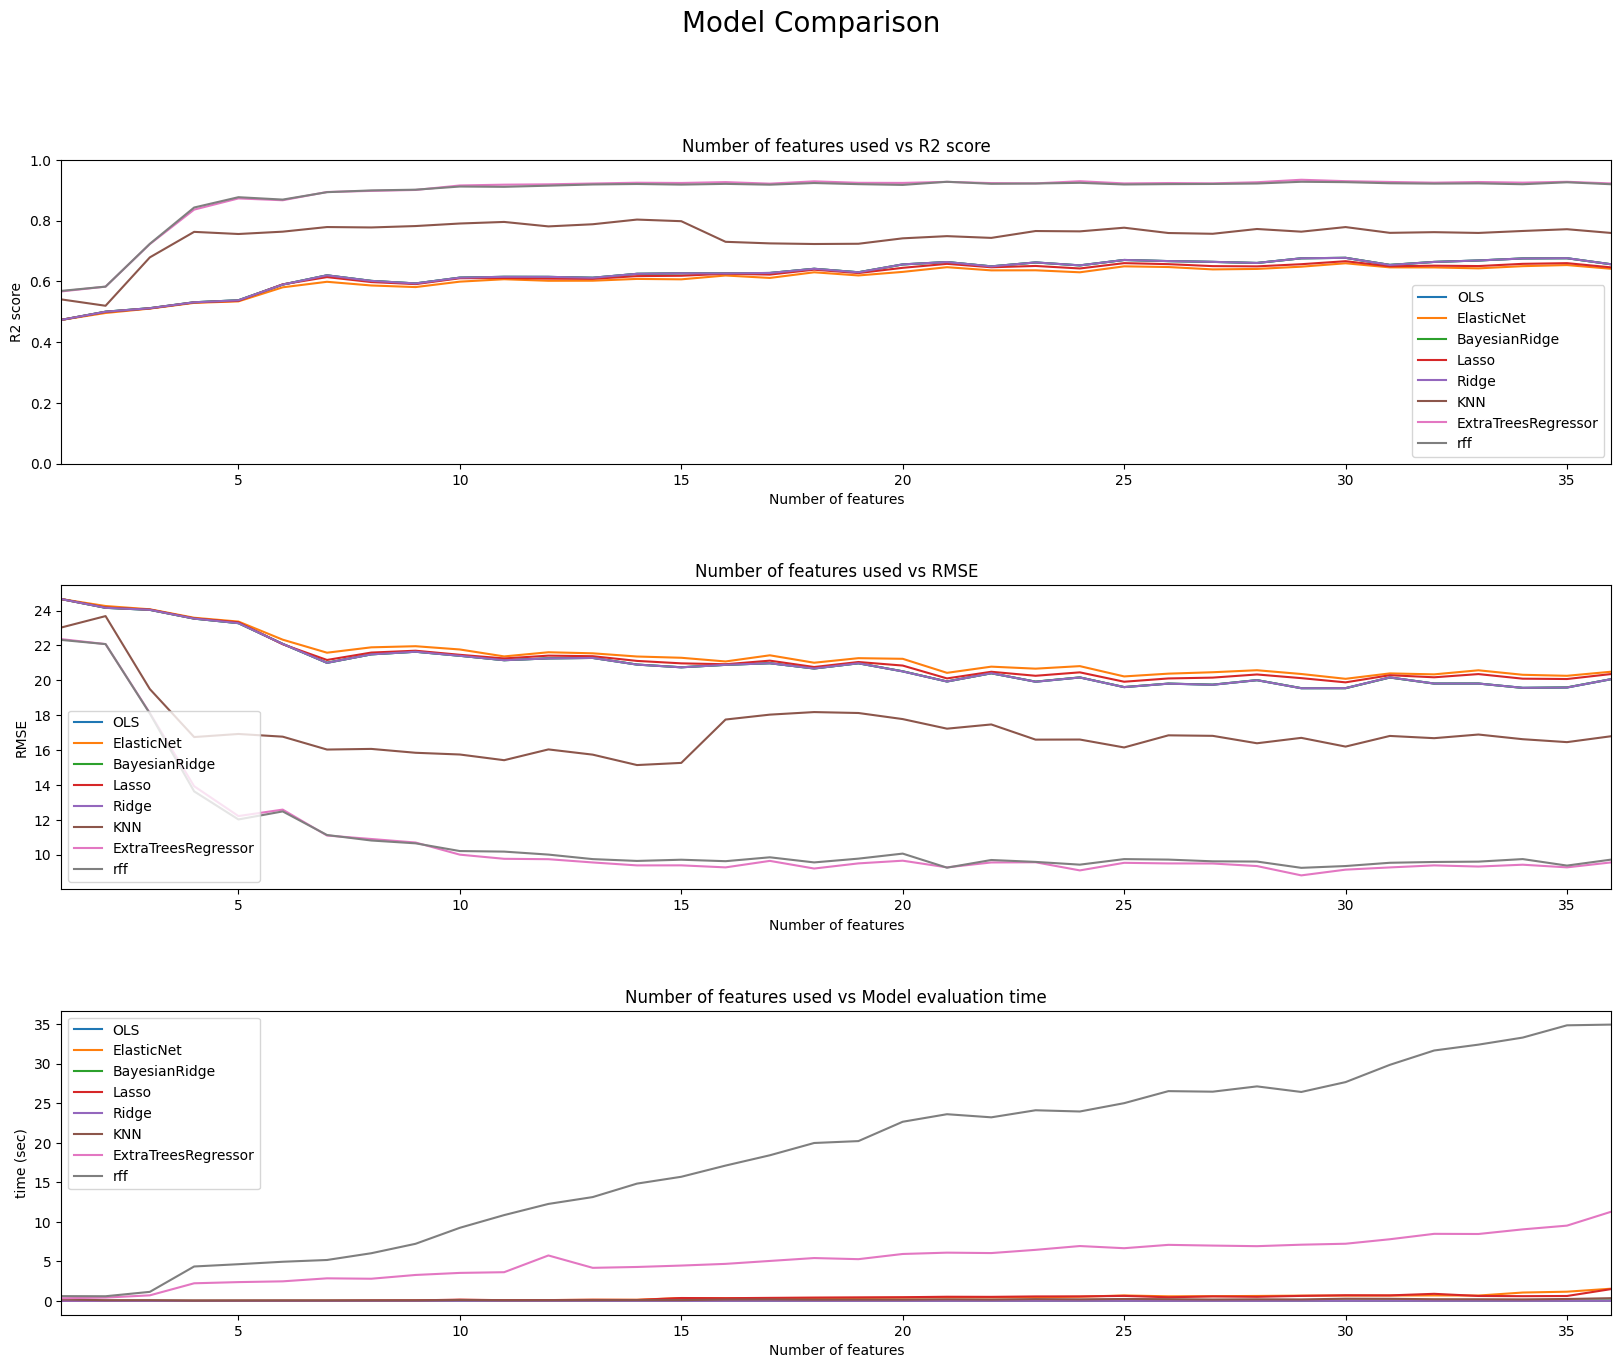

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(20, 15))
fig.suptitle('Model Comparison', fontsize=20)

# Plot R2 score
for col in df_merged.columns:
    if 'R2' in col:
        axs[0].plot(df_merged['features'], df_merged[col], label=col.split('_')[1])
axs[0].set_title('Number of features used vs R2 score')
axs[0].set_xlabel('Number of features')
axs[0].set_ylabel('R2 score')
axs[0].legend()
axs[0].set_ylim(0, 1)
axs[0].set_xlim(1, 36)

# Plot RMSE
for col in df_merged.columns:
    if 'RMSE' in col:
        axs[1].plot(df_merged['features'], df_merged[col], label=col.split('_')[1])
axs[1].set_title('Number of features used vs RMSE')
axs[1].set_xlabel('Number of features')
axs[1].set_ylabel('RMSE')
axs[1].legend()
axs[1].set_xlim(1, 36)

# Plot model evaluation time
for col in df_merged.columns:
    if 'time' in col:
        axs[2].plot(df_merged['features'], df_merged[col], label=col.split('_')[1])
axs[2].set_title('Number of features used vs Model evaluation time')
axs[2].set_xlabel('Number of features')
axs[2].set_ylabel('time (sec)')
axs[2].legend()
axs[2].set_xlim(1, 36)

plt.subplots_adjust(hspace=0.4)
plt.savefig('Model_Comparison.png')
plt.show()

This code creates a new DataFrame best_results that contains the best results for each model in the results DataFrame. It does this by sorting the results DataFrame by the RMSE column in ascending order and taking the first row for each unique model. The resulting DataFrame is then transposed and the index column is dropped. The DataFrame is then sorted again by the RMSE column in ascending order and the index column is reset and dropped. The final DataFrame contains only the columns model, RMSE, R2 score, features, and time. The features column is renamed to # of features used. The values in the RMSE, R2 score, and time columns are rounded to 4 decimal places.

In [13]:
best_results = pd.DataFrame()

for model in results['model'].unique():
    best_result = results[results['model'] == model].sort_values(by='RMSE').iloc[0]
    best_results = pd.concat([best_results, best_result.to_frame().T])

best_results = best_results[['model', 'RMSE', 'R2 score', 'features', 'time']]
best_results = best_results.rename(columns={'features': '# of features used'})
best_results[['RMSE', 'R2 score', 'time']] = best_results[['RMSE', 'R2 score', 'time']].round(4)
best_results = best_results.sort_values(by='RMSE').reset_index(drop=True)

best_results

,model,RMSE,R2 score,# of features used,time
0,ExtraTreesRegressor,8.813113,0.934079,29,7.110999
1,rff,9.245663,0.927449,29,26.423414
2,KNN,15.140295,0.803092,14,0.106732
3,BayesianRidge,19.546809,0.677359,30,0.023936
4,OLS,19.547403,0.675702,29,0.019948
5,Ridge,19.547468,0.6757,29,0.013962
6,Lasso,19.88373,0.666141,30,0.716084
7,ElasticNet,20.087022,0.659279,30,0.677189


This code creates a new DataFrame df2 that contains a single row of '---' strings with the same number of columns as the best_results DataFrame. It then concatenates df2 with best_results to create a new DataFrame df3. Finally, it saves df3 as a markdown file named “best_results.md” using the pipe character | as a separator.

In [14]:
cols = best_results.columns
# Create a new DataFrame with just the markdown
# strings
df2 = pd.DataFrame([['---',]*len(cols)], columns=cols)
#Create a new concatenated DataFrame
df3 = pd.concat([df2, best_results])
#Save as markdown
df3.to_csv("best_results.md", sep="|", index=False)
#Source : https://stackoverflow.com/questions/33181846/programmatically-convert-pandas-dataframe-to-markdown-table
# reply #8

The code performs an experiment to evaluate the performance of RandomForestRegressor models with different forest sizes (n_estimators) and feature selection methods (max_features). Specifically, it trains RandomForestRegressor models with forest sizes ranging from 5 to 300, and for each forest size, it trains three models with different feature selection methods (max_features='sqrt', max_features='log2', and the default max_features=None). It then evaluates the performance of each model on a held-out test set using the root mean squared error (RMSE) metric and stores the train and test errors for each model.

In [15]:
import random

# Load data and preprocess
# Assumes X and y are already defined

test_errors = []
train_errors = []
test_errors_sqrt = []
train_errors_sqrt = []
test_errors_log2 = []
train_errors_log2 = []

forest_sizes = [5, 10, 20, 30, 40, 50, 75, 85, 95, 100, 105, 115, 125, 150, 175, 200, 225, 250, 275, 300]

for size in forest_sizes:
    rf = RandomForestRegressor(n_estimators=size)
    rf_sqrt = RandomForestRegressor(n_estimators=size, max_features='sqrt')
    rf_log2 = RandomForestRegressor(n_estimators=size, max_features='log2')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random.randint(1, 101))

    rf.fit(X_train, y_train)
    rf_sqrt.fit(X_train, y_train)
    rf_log2.fit(X_train, y_train)

    y_pred_test = rf.predict(X_test)
    y_pred_train = rf.predict(X_train)
    test_error = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_error = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_errors.append(test_error)
    train_errors.append(train_error)

    y_pred_test_sqrt = rf_sqrt.predict(X_test)
    y_pred_train_sqrt = rf_sqrt.predict(X_train)
    test_error_sqrt = np.sqrt(mean_squared_error(y_test, y_pred_test_sqrt))
    train_error_sqrt = np.sqrt(mean_squared_error(y_train, y_pred_train_sqrt))
    test_errors_sqrt.append(test_error_sqrt)
    train_errors_sqrt.append(train_error_sqrt)

    y_pred_test_log2 = rf_log2.predict(X_test)
    y_pred_train_log2 = rf_log2.predict(X_train)
    test_error_log2 = np.sqrt(mean_squared_error(y_test, y_pred_test_log2))
    train_error_log2 = np.sqrt(mean_squared_error(y_train, y_pred_train_log2))
    test_errors_log2.append(test_error_log2)
    train_errors_log2.append(train_error_log2)

The code extracts the minimum test error and the corresponding number of trees for three different models trained using the RandomForestRegressor algorithm with different hyperparameters. It then prints these values to the consol

In [16]:
# Extract minimum test errors and corresponding number of trees
min_error, best_number_trees = min(zip(test_errors, forest_sizes))
min_error_sqrt, best_number_trees_sqrt = min(zip(test_errors_sqrt, forest_sizes))
min_error_log2, best_number_trees_log2 = min(zip(test_errors_log2, forest_sizes))

# Print results to console
print(f"Best number of trees: {best_number_trees}")
print(f"Best test RMSE: {min_error:.4f}")
print(f"Best number of trees (sqrt): {best_number_trees_sqrt}")
print(f"Best test RMSE (sqrt): {min_error_sqrt:.4f}")
print(f"Best number of trees (log2): {best_number_trees_log2}")
print(f"Best test RMSE (log2): {min_error_log2:.4f}")

Best number of trees: 125
Best test RMSE: 8.8195
Best number of trees (sqrt): 125
Best test RMSE (sqrt): 8.9349
Best number of trees (log2): 125
Best test RMSE (log2): 8.8843


The code creates a plot of the test and train errors for three different models trained using the RandomForestRegressor algorithm with different hyperparameters. It also adds a vertical line at the best number of trees and a text label indicating the best fit model. Finally, it saves the plot to a file and displays it in the console.

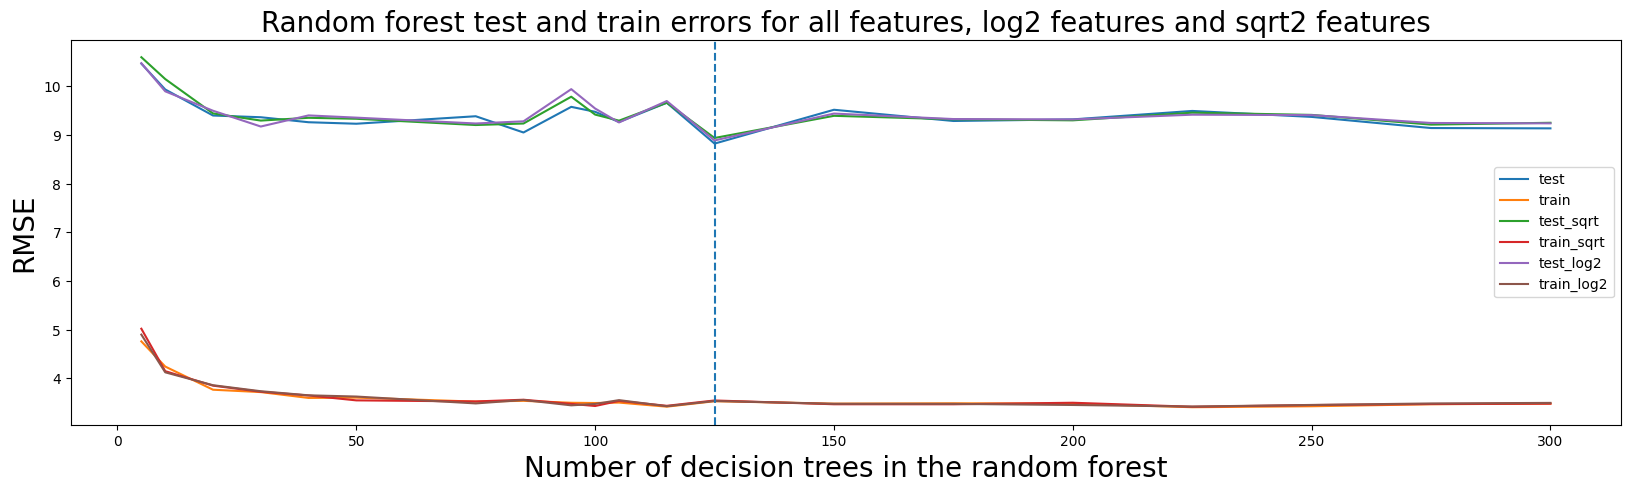

In [17]:
# Create plot of test and train errors
plt.figure(figsize=(20,5))

plt.title('''Random forest test and train errors for all features, log2 features and sqrt2 features''',fontsize=20)
plt.plot(forest_sizes,test_errors,label='test')
plt.plot(forest_sizes,train_errors,label='train')

plt.plot(forest_sizes,test_errors_sqrt,label='test_sqrt')
plt.plot(forest_sizes,train_errors_sqrt,label='train_sqrt')

plt.plot(forest_sizes,test_errors_log2,label='test_log2')
plt.plot(forest_sizes,train_errors_log2,label='train_log2')
# Add annotations and legend

plt.ylabel('RMSE',fontsize=20)
plt.xlabel('Number of decision trees in the random forest',fontsize=20)
plt.axvline(best_number_trees,linestyle='dashed')
plt.legend()
# Save plot to file and display in console

plt.savefig('RF_hyper_parameter_tuning.png')
plt.show()

This code reads a CSV file named ‘data_filtered.csv’ into a DataFrame df and drops the ‘Unnamed: 0’ column. It then creates two new DataFrames X and y. X contains all columns of df except for the ‘critical_temp’ column, while y contains only the ‘critical_temp’ column. The values in X are then standardized using the StandardScaler from the sklearn.preprocessing module.

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle

# Load data and preprocess
df = pd.read_csv('data_filtered.csv').drop('Unnamed: 0', axis=1)
X = df.drop('critical_temp', axis=1)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = df['critical_temp']

# Train model
rf = RandomForestRegressor(n_estimators=200,max_features='log2',random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf.fit(X_train, y_train)

# Evaluate model performance
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
min_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 4)
r2 = r2_score(y_test, y_pred_test)
print('RMSE = ', min_rmse)
print('R2 = ', r2)

# Save trained model to disk
filename = 'finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))

RMSE =  9.2554
R2 =  0.9259213749173226


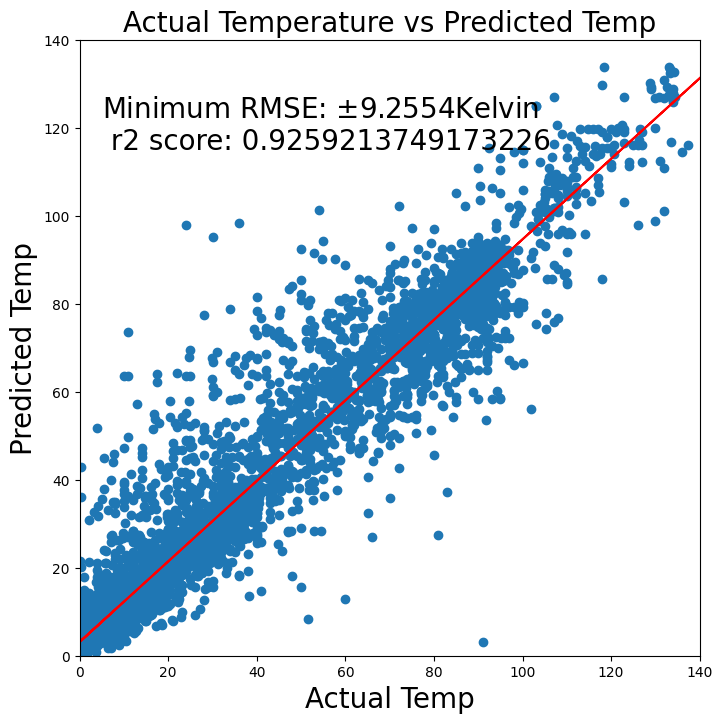

In [19]:
from scipy import stats

# Convert numpy arrays to pandas Series or DataFrame objects
y_pred_test = pd.Series(y_pred_test)
y_pred_train = pd.Series(y_pred_train)
y_test = pd.Series(y_test)
y_train = pd.Series(y_train)

# Remove any NaN values
y_pred_test = y_pred_test.dropna()
y_pred_train = y_pred_train.dropna()
y_test = y_test.dropna()
y_train = y_train.dropna()


slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,y_pred_test)
line = slope*y_test+intercept
plt.figure(figsize=(8,8))
plt.plot(y_test,line,color='red')
plt.scatter(y_test,y_pred_test)
plt.ylabel('Predicted Temp',fontsize=20)
plt.xlabel('Actual Temp',fontsize=20)
plt.ylim(0,140)
plt.xlim(0,140)
text = r'$\pm'+str(min_rmse)+'$'+'Kelvin \n r2 score: '+str(r2)
plt.text(5,115,'Minimum RMSE: '+text,fontsize=20)
plt.title('Actual Temperature vs Predicted Temp',fontsize=20)
plt.show()

This code generates four subplots that visualize the errors of a machine learning model on a test and train set. The first and second subplots show the distribution of errors on the test and train sets, respectively, using a histogram with a KDE overlay. The third and fourth subplots show a Q-Q plot of the errors on the test and train sets, respectively.

A Q-Q plot is a graphical method for testing the normality of a distribution. It compares the quantiles of a sample distribution (in this case, the errors) to the quantiles of a theoretical distribution (in this case, a normal distribution). If the sample distribution is normal, the points on the Q-Q plot will fall along a straight line. If the sample distribution is not normal, the points will deviate from the straight line

C:\Users\Mohamed Ali\AppData\Local\Temp\ipykernel_18804\2407243437.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors_test, kde=False, ax=axes[0, 0])
C:\Users\Mohamed Ali\AppData\Local\Temp\ipykernel_18804\2407243437.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors_test, kde=

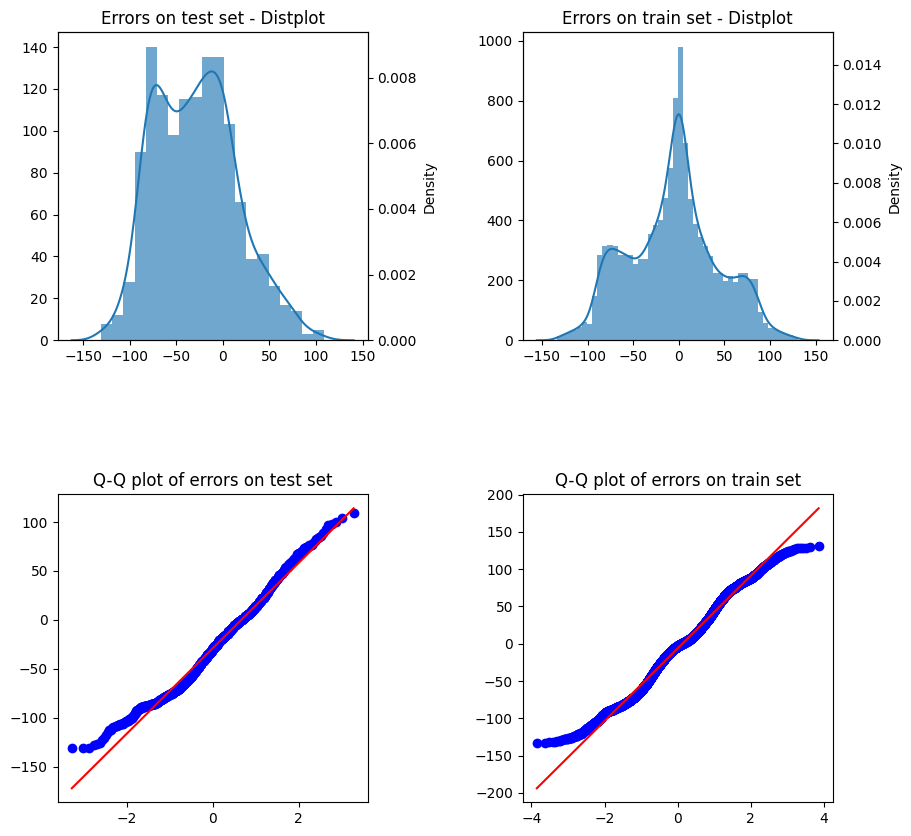

In [20]:
import seaborn as sns
from scipy.stats import norm
from scipy import stats

# Calculate errors for test and train sets
errors_test = (y_pred_test - y_test).dropna()
errors_train = (y_pred_train - y_train).dropna()

# Create a figure with subplots for displaying error distributions and Q-Q plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot test set errors distribution
sns.distplot(errors_test, kde=False, ax=axes[0, 0])
sns.distplot(errors_test, kde=True, hist=True, ax=axes[0, 0].twinx())
axes[0, 0].set(title='Errors on test set - Distplot', xlabel='', ylabel='')

# Plot train set errors distribution
sns.distplot(errors_train, kde=False, ax=axes[0, 1])
sns.distplot(errors_train, kde=True, ax=axes[0, 1].twinx())
axes[0, 1].set(title='Errors on train set - Distplot', xlabel='', ylabel='')

# Plot Q-Q plot of test set errors
stats.probplot(errors_test, plot=axes[1, 0])
axes[1, 0].set(title='Q-Q plot of errors on test set', xlabel='', ylabel='')

# Plot Q-Q plot of train set errors
stats.probplot(errors_train, plot=axes[1, 1])
axes[1, 1].set(title='Q-Q plot of errors on train set', xlabel='', ylabel='')

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Display the figure
plt.show()

In [21]:
rf = RandomForestRegressor(n_estimators=best_number_trees,max_features='sqrt')
rf.fit(X_train,y_train)

importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf_log2.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

The code first creates an empty list feature_importances, which will be used to store the importance of each feature. Then, it loops through each column of the input data X and prints the feature importance score of that column along with its corresponding column name X.columns[indices[f]]. The feature importance score is stored in the importances list, which is indexed using the values in the indices list.

In [22]:
# Calculate feature importance scores and print the ranking
print("Feature ranking:")
feature_importances = []
for index in range(X.shape[1]):
    score = importances[indices[index]]
    name = X.columns[indices[index]]
    print(f"{index+1}. {name} ({score:.6f})")
    feature_importances.append((name, score))

Feature ranking:
1. Cu (0.122017)
2. O (0.108518)
3. range_ThermalConductivity (0.103171)
4. range_fie (0.077891)
5. Ba (0.052341)
6. wtd_mean_ThermalConductivity (0.047120)
7. wtd_range_Valence (0.046292)
8. Ca (0.040768)
9. range_ElectronAffinity (0.032525)
10. number_of_elements (0.029630)
11. wtd_entropy_fie (0.027745)
12. gmean_ThermalConductivity (0.026522)
13. wtd_range_ElectronAffinity (0.022301)
14. mean_ThermalConductivity (0.021418)
15. wtd_mean_ElectronAffinity (0.020972)
16. wtd_range_fie (0.020635)
17. range_Density (0.020005)
18. wtd_entropy_ThermalConductivity (0.019958)
19. mean_FusionHeat (0.019642)
20. wtd_mean_fie (0.019135)
21. range_atomic_mass (0.017724)
22. mean_Density (0.014961)
23. wtd_range_atomic_mass (0.013614)
24. wtd_range_atomic_radius (0.011558)
25. mean_atomic_radius (0.010576)
26. mean_ElectronAffinity (0.009834)
27. mean_atomic_mass (0.009662)
28. mean_fie (0.008590)
29. Sr (0.007066)
30. range_Valence (0.004791)
31. range_FusionHeat (0.004611)
32. 

Based on the code and output provided, it appears that the code is performing a feature ranking and selection process, followed by training and evaluating several machine learning models. Here are some observations:

The feature ranking section appears to be using a random forest model to determine the importance of each feature in predicting the target variable.
The code then drops highly correlated features and low-importance features, resulting in a final set of 36 features.
The code then trains and evaluates several regression models, including ExtraTreesRegressor, Random Fourier Features (rff), K-Nearest Neighbors (KNN), Bayesian Ridge, Ordinary Least Squares (OLS), Ridge, Lasso, and ElasticNet. The evaluation metrics used are root mean squared error (RMSE) and R-squared (R2) score.
The output shows the results of the feature ranking and selection process, as well as the performance of each model on the test set. It also shows the best performing model, which is the ExtraTreesRegressor with 29 features, achieving an RMSE of 8.793583 and an R2 score of 0.934371.

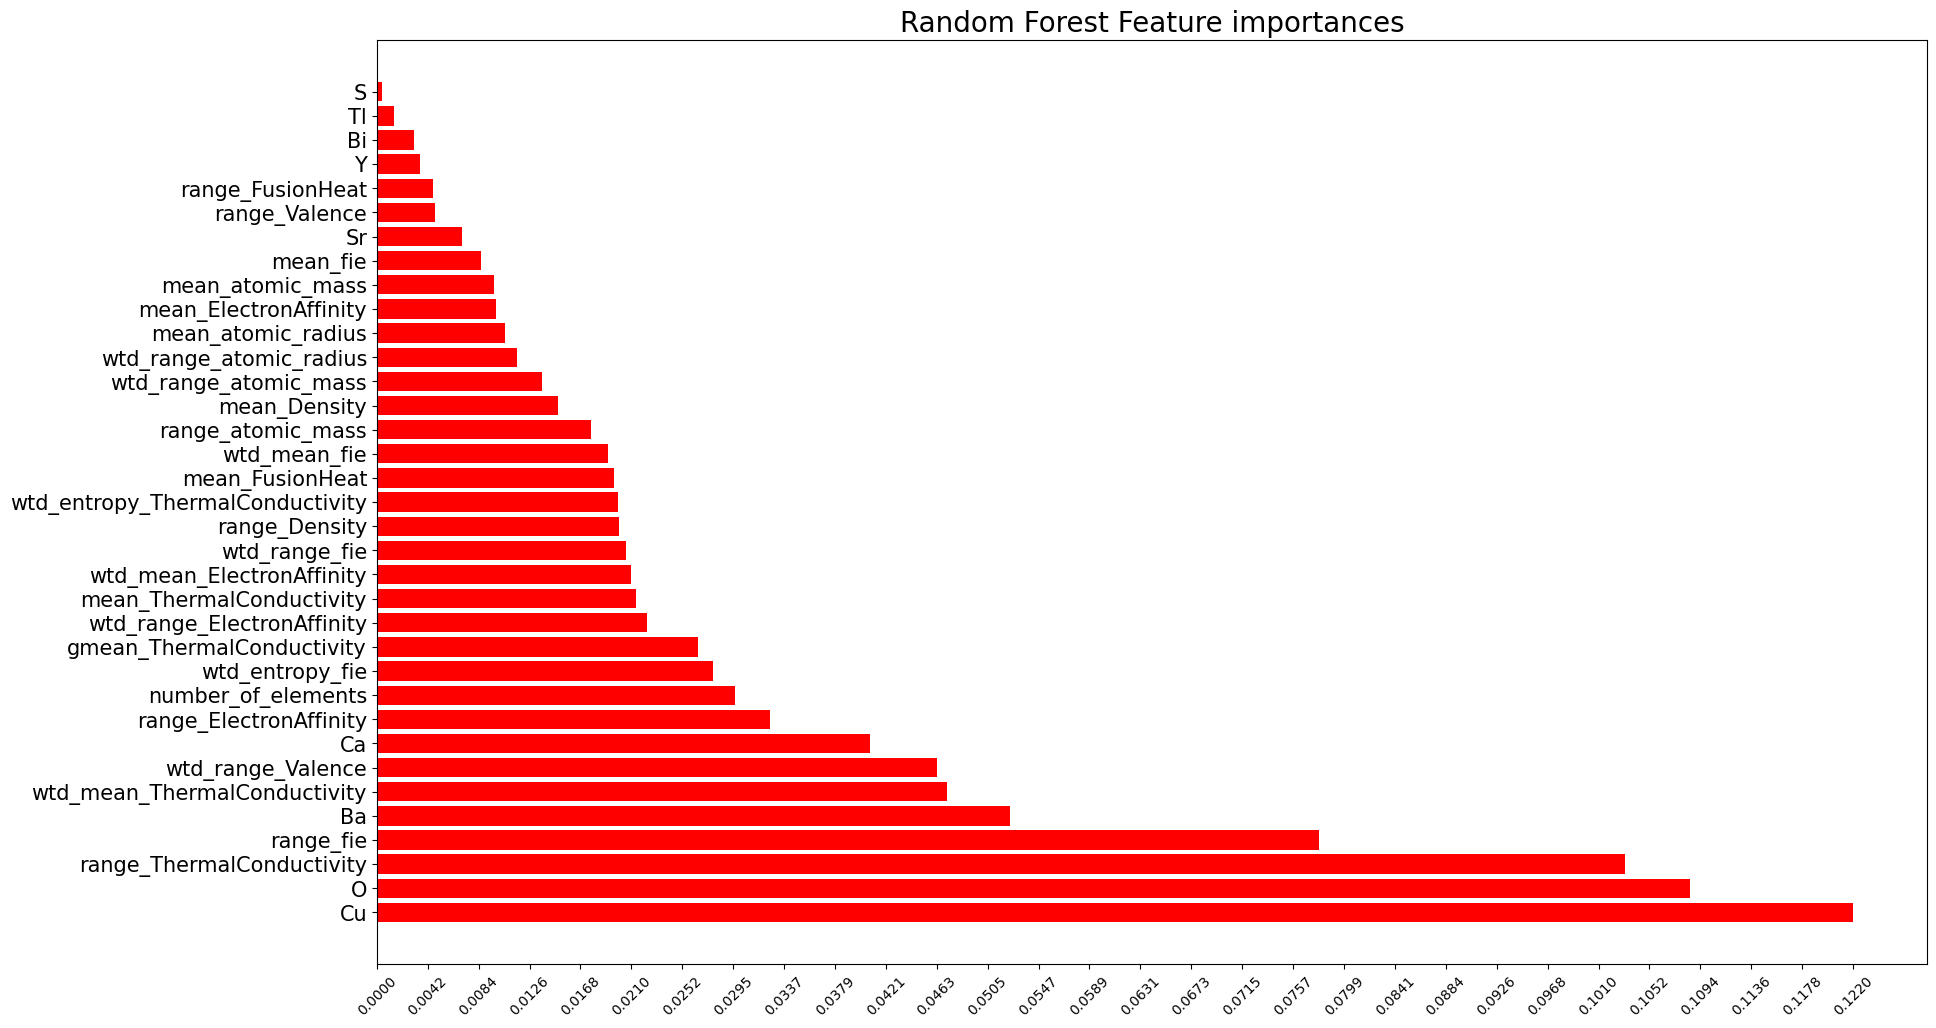

In [23]:
# Print the feature ranking

values = [i[1] for i in feature_importances]
names = [i[0] for i in feature_importances]

# Plot the feature importances of the forest
plt.figure(figsize=(20,12))
plt.title("Random Forest Feature importances",fontsize=20)
plt.barh(range(len(names)),values,
       color="r", yerr=std[indices], align="center")
plt.yticks(range(len(names)),names,fontsize=15)
plt.xticks(np.linspace(0,max(importances),30),rotation=45)
plt.savefig('RF_feature_importance.png')
plt.show()

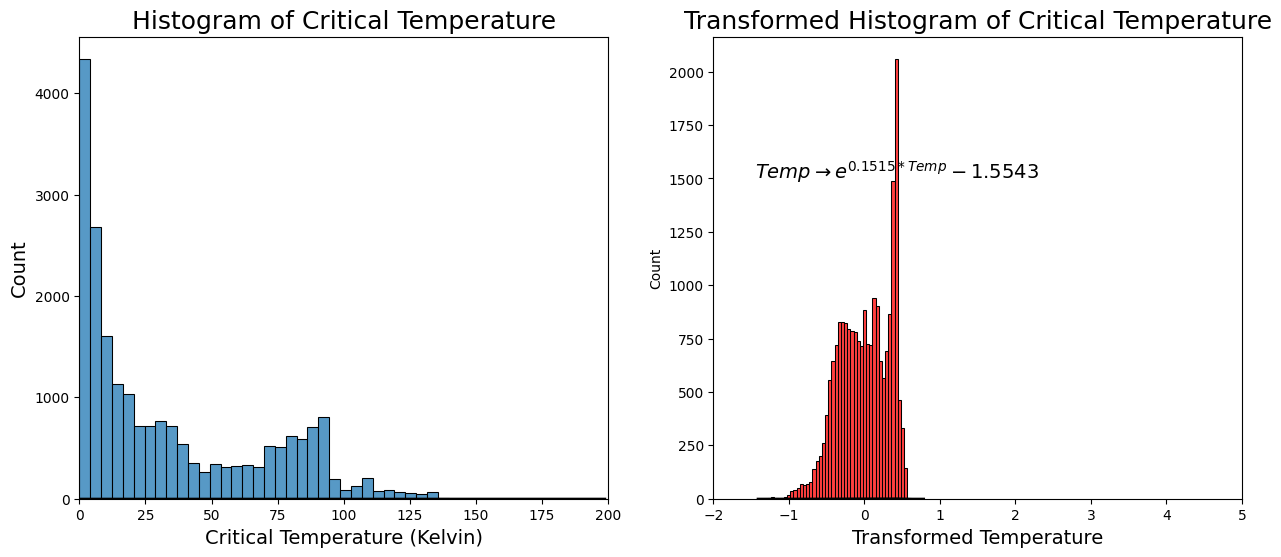

In [24]:
# Load data and calculate transformation parameter
df = pd.read_csv('data_filtered.csv').drop('Unnamed: 0', axis=1)
y = df['critical_temp']
e = 0.1515
y_mean = y.apply(lambda x: (x ** e)).mean()

# Create subplots of histograms before and after transformation
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# First subplot: standard histogram
sns.histplot(y, ax=ax[0], kde=False)
sns.kdeplot(y, ax=ax[0], color='k')
ax[0].set_title('Histogram of Critical Temperature', fontsize=18)
ax[0].set_xlabel('Critical Temperature (Kelvin)', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].set_xlim(0, 200)

# Second subplot: transformed histogram
y_transformed = y.apply(lambda x: (x ** e) - y_mean)
sns.histplot(y_transformed, ax=ax[1], kde=False, color='red')
sns.kdeplot(y_transformed, ax=ax[1], color='k')
ax[1].set_title('Transformed Histogram of Critical Temperature', fontsize=18)
ax[1].set_xlabel('Transformed Temperature', fontsize=14)
ax[1].text(-1.45, 1500, r'$Temp \rightarrow e^{0.1515*Temp}-1.5543$', fontsize=14)
ax[1].set_xlim(-2, 5)

# Adjust spacing and save figure
fig.subplots_adjust(wspace=0.2)
fig.savefig('critical_temp_hist.png', dpi=300)
plt.show()